In [1]:
import os
import sys
import numpy as np
import pandas as pd
import igraph as ig
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_settings_v3 import *
from plot_auxiliary import *
from planar import create_proximity_graph
from auxiliary import getLinearReg, get_base_network_name, powerlaw

%matplotlib inline

param = 'param'

net_types = ['DT', 'PDT']
base_attacks = ['Btw', 'BtwU']



In [2]:
l_values = np.arange(2, 100)
min_nseeds = 100
sizes_dict = {
    'DT': {
        'Btw':  [128, 256, 512, 1024, 2048, 4096, 8192, 16384],
        'BtwU': [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
    },
    'PDT': {
        'Btw':  [128, 256, 512, 1024, 2048, 4096, 8192],
        'BtwU': [128, 256, 512, 1024, 2048, 4096]
    }
}

data = {}
for net_type in net_types:
    data[net_type] = {}
    net_dir = os.path.join('..', 'networks', net_type)
    for base_attack in base_attacks:
        sizes = sizes_dict[net_type][base_attack]
        rc_values, rc_values_std = get_rc_values(
            sizes, l_values=l_values, min_nseeds=min_nseeds, base_attack=base_attack, net_type=net_type
        )
        l_cutoff = get_l_cutoff(sizes, threshold=0.02, rc_values=rc_values, base_attack=base_attack, net_type=net_type)
        
        data[net_type][base_attack] = (rc_values, l_cutoff)
        print(net_type, base_attack, l_cutoff)

128
256
512
1024
2048
4096
8192
16384
DT Btw {128: 4, 256: 6, 512: 11, 1024: 15, 2048: 22, 4096: 30, 8192: 41, 16384: 56}
128
256
512
1024


/media/nahuel/E/E/dismantlingScaling/python/plot_auxiliary.py:77: UserWarning: loadtxt: Empty input file: "../networks/DT/DT_param/DT_param_N1024/Delta_values_BtwU_cutoff31_nSeeds1000.txt"
  delta_values = np.loadtxt(delta_file_name)
/media/nahuel/E/E/dismantlingScaling/python/plot_auxiliary.py:77: UserWarning: loadtxt: Empty input file: "../networks/DT/DT_param/DT_param_N1024/Delta_values_BtwU_cutoff32_nSeeds1000.txt"
  delta_values = np.loadtxt(delta_file_name)


2048
4096


/media/nahuel/E/E/dismantlingScaling/python/plot_auxiliary.py:77: UserWarning: loadtxt: Empty input file: "../networks/DT/DT_param/DT_param_N4096/Delta_values_BtwU_cutoff31_nSeeds100.txt"
  delta_values = np.loadtxt(delta_file_name)


8192


/media/nahuel/E/E/dismantlingScaling/python/plot_auxiliary.py:77: UserWarning: loadtxt: Empty input file: "../networks/DT/DT_param/DT_param_N8192/Delta_values_BtwU_cutoff17_nSeeds100.txt"
  delta_values = np.loadtxt(delta_file_name)
/media/nahuel/E/E/dismantlingScaling/python/plot_auxiliary.py:77: UserWarning: loadtxt: Empty input file: "../networks/DT/DT_param/DT_param_N8192/Delta_values_BtwU_cutoff18_nSeeds100.txt"
  delta_values = np.loadtxt(delta_file_name)
/media/nahuel/E/E/dismantlingScaling/python/plot_auxiliary.py:77: UserWarning: loadtxt: Empty input file: "../networks/DT/DT_param/DT_param_N8192/Delta_values_BtwU_cutoff19_nSeeds100.txt"
  delta_values = np.loadtxt(delta_file_name)
/media/nahuel/E/E/dismantlingScaling/python/plot_auxiliary.py:77: UserWarning: loadtxt: Empty input file: "../networks/DT/DT_param/DT_param_N8192/Delta_values_BtwU_cutoff21_nSeeds100.txt"
  delta_values = np.loadtxt(delta_file_name)
/media/nahuel/E/E/dismantlingScaling/python/plot_auxiliary.py:77: Us

16384
DT BtwU {128: 11, 256: 14, 512: 19, 1024: 24, 2048: 32, 4096: 40, 8192: 54, 16384: 72}
128
256
512
1024
2048
4096
8192
PDT Btw {128: 5, 256: 7, 512: 9, 1024: 15, 2048: 19, 4096: 27}
128
256
512
1024
2048
4096
PDT BtwU {128: 9, 256: 12, 512: 16, 1024: 20}


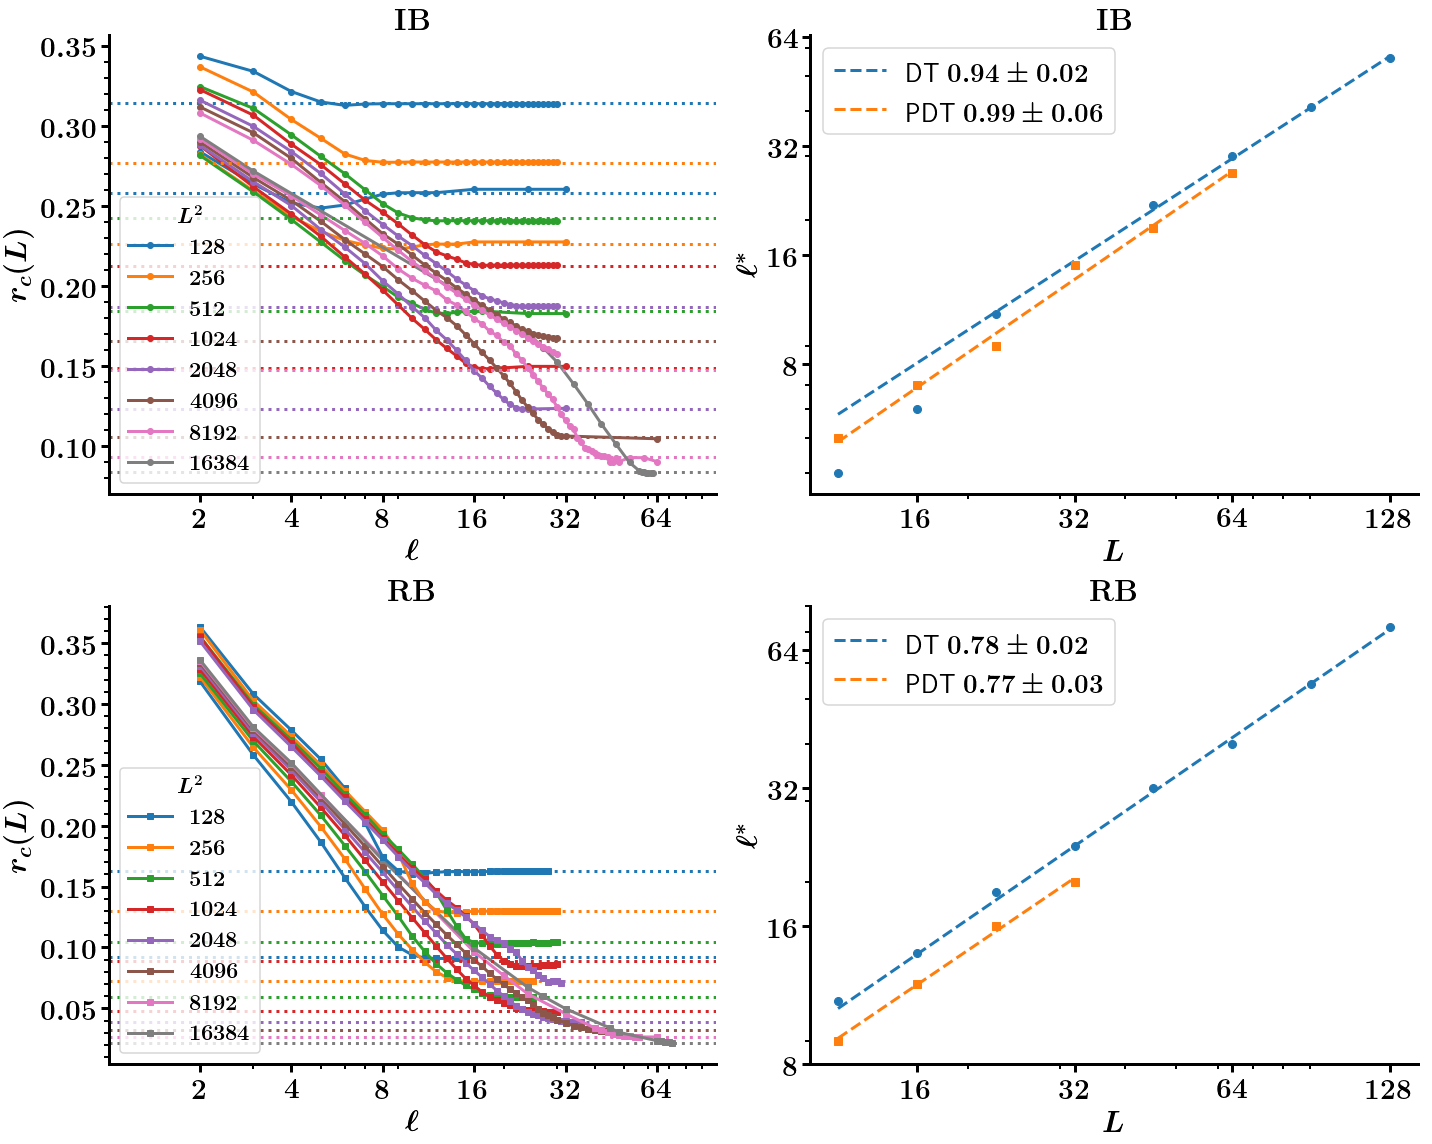

In [3]:
markers = ['o', 's']

color_dict = {int(2**(7+i)): f'C{i}' for i in range(10)}

ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols,8*nrows), ncols=ncols, nrows=nrows)

for k, net_type in enumerate(net_types):
    for j, base_attack in enumerate(base_attacks):
        if net_type == 'PDT' and base_attack == 'BtwU':
            #continue
            pass
        rc_values, l_cutoff = data[net_type][base_attack]

        #ax = axes[2*k+j,0]
        ax = axes[j,0]
        ax.set_title(attack_dict[base_attack], fontsize=30)
        ax.tick_params(which='minor', length=5)
        ax.tick_params(which='major', length=8)

        ax.set_xscale('log')
        ax.set_xlim(1., 100)
        ax.set_xticks([2, 4, 8, 16, 32, 64])
        ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
        ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
        #ax.set_yscale('log')
        #ax.set_ylim(0.015, 0.4)
        #ax.set_yticks([0.03, 0.1, 0.3])
        ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
        ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

        #ax.grid(True)
        #ax.set_ylim(0, 0.15)
        ax.set_xlabel(r'$\ell$')
        ax.set_ylabel(r'$r_c(L)$')
        
        sizes = sizes_dict[net_type][base_attack]
        for i, size in enumerate(sizes): 

            mask = ~np.isnan(rc_values[size][1:])

            X = l_values[mask]
            Y = rc_values[size][1:][mask]
            label = r'${{{}}}$'.format(size) if net_type == 'DT' else ''
            ax.plot(X, Y, '-', marker=markers[j], color=color_dict[size],
                    label=label
            )
            ax.axhline(rc_values[size][0], linestyle=':', color=color_dict[size])
            #ax.axvline(l_cutoff[size], linestyle=':', color=colors[i])

        
        ######################################

        
        #ax = axes[2*k+j,1]
        ax = axes[j,1]
        ax.set_title(attack_dict[base_attack], fontsize=30)
        ax.tick_params(which='minor', length=5)
        ax.tick_params(which='major', length=8)

        X = np.sqrt(list(l_cutoff.keys()))
        Y = np.array(list(l_cutoff.values()))
        ax.set_xlabel(r'$L$')
        ax.set_ylabel(r'$\ell^*$')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.plot(X, Y, markers[k], color=colors[k], markersize=8)

        Y_pred, slope, y_err = getLinearReg(X[-5:], Y[-5:])

        c = Y_pred[-1] / X[-1]**slope
        Y_pred = powerlaw(X, slope, c)

        label = net_type + ' ' + r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err)
        ax.plot(X, Y_pred, '--', color=colors[k], label=label)
        #ax.text(0.05, 0.45, r'$\ell^* \sim L^{\alpha}$', fontsize=30, transform=ax.transAxes)


        #c = Y_pred[-3] / X[-3]
        #Y_pred = powerlaw(X, 1, c)

        #label = r'$\mathrm{slope} = 1$' 
        #ax.plot(X, Y_pred, '-', color='gray', label=label)


        #ax.set_xlim(12, 128)
        ax.set_xticks([16, 32, 64, 128])
        ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
        ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

        ax.set_yticks([8, 16, 32, 64])
        ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
        ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

for i in range(2):
    ax = axes[i,0]
    legend = ax.legend(loc='lower left', fontsize=22)
    legend.set_title(r'$L^2$', prop={'size':22})
    
    ax = axes[i,1]
    ax.legend()


        ###############################################################
    
sns.despine()
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'rc_cutoff')
plt.savefig(fig_name + '.png', transparent=False)
plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()